### Agregando Regiões Geográficas

In [8]:
%matplotlib inline
import geopandas as gpd

In [9]:
setor = gpd.read_file('../01.Dados/Mapas/RJ-SETOR/RJ-SETOR.shp')

<AxesSubplot:>

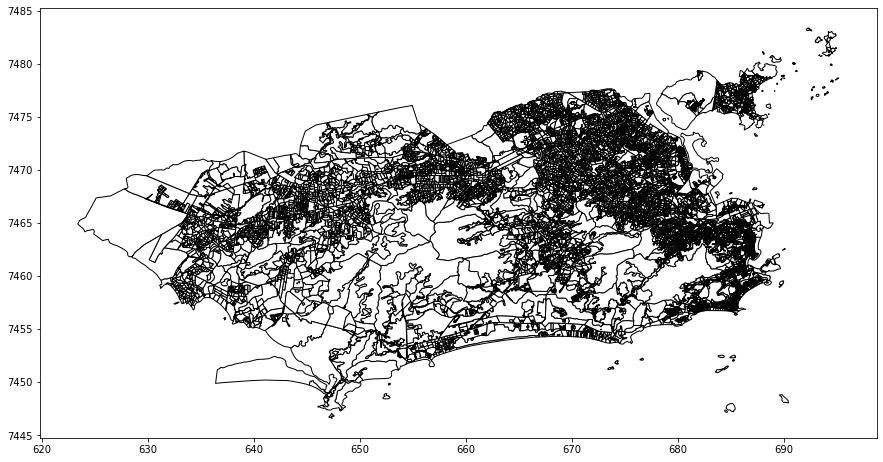

In [10]:
setor.plot(color='white',edgecolor='black',figsize=(15,8))

In [4]:
setor_m = setor[['NM_BAIRRO', 'geometry']]

In [12]:
setor = setor.to_crs({'init': 'epsg:4326'})
bairro = setor_m.dissolve(by='NM_BAIRRO')

C:\Users\luis.motta\Anaconda3\envs\test_python\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

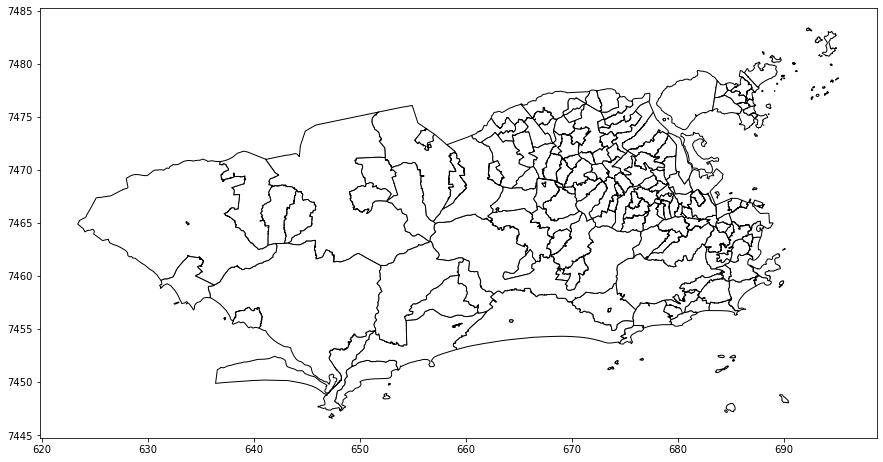

In [13]:
bairro.plot(color='white', edgecolor='black', figsize=(15,8))

In [14]:
bairro

,geometry
NM_BAIRRO,
Abolição,"POLYGON ((674.902 7467.737, 674.936 7467.767, ..."
Acari,"POLYGON ((670.474 7474.718, 670.405 7474.689, ..."
Alto da Boa Vista,"POLYGON ((674.901 7457.693, 674.898 7457.693, ..."
Anchieta,"POLYGON ((663.045 7474.050, 663.041 7474.046, ..."
Andaraí,"POLYGON ((679.002 7462.700, 679.002 7462.700, ..."
...,...
Vila Valqueire,"POLYGON ((667.473 7466.993, 667.477 7466.985, ..."
Vila da Penha,"POLYGON ((673.691 7472.193, 673.672 7472.177, ..."
Vista Alegre,"POLYGON ((673.524 7473.970, 673.517 7473.968, ..."


In [15]:
setor_m = setor[['NM_BAIRRO', 'geometry', 'V002']]
bairro = setor_m.dissolve(by='NM_BAIRRO', aggfunc='sum')

In [16]:
bairro

,geometry,V002
NM_BAIRRO,,
Abolição,"POLYGON ((-43.29489 -22.88916, -43.29457 -22.8...",11356.0
Acari,"POLYGON ((-43.33882 -22.82658, -43.33949 -22.8...",26967.0
Alto da Boa Vista,"POLYGON ((-43.29377 -22.97986, -43.29380 -22.9...",9189.0
Anchieta,"POLYGON ((-43.41112 -22.83336, -43.41115 -22.8...",55634.0
Andaraí,"POLYGON ((-43.25436 -22.93422, -43.25436 -22.9...",39325.0
...,...,...
Vila Valqueire,"POLYGON ((-43.36722 -22.89664, -43.36718 -22.8...",32232.0
Vila da Penha,"POLYGON ((-43.30720 -22.84905, -43.30738 -22.8...",25462.0
Vista Alegre,"POLYGON ((-43.30903 -22.83303, -43.30909 -22.8...",8622.0


In [17]:
setor_m['V002'].sum()

6283486.0

In [18]:
bairro['V002'].sum()

6283486.0

In [20]:
bairro = bairro.to_crs('+proj=utm +zone=23, +south +ellps=GRS80 +tougs=84=0,0,0,0,0,0,0 +units=km +no_defs')

In [21]:
bairro.reset_index(inplace=True)

In [23]:
import os
dir = '../01.Dados/Mapas/RJ-BAIRRO'
if not os.path.exists(dir):
    os.makedirs(dir)

In [24]:
bairro.to_file(dir + '/RJ-BAIRRO.shp')